.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')

preparing data

In [25]:
city_temp=pd.read_csv("../data/raw/temperature.csv")
city_temp.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
20855,2015-02-17 11:00:00,273.817,278.450333,283.083667,278.867,277.933667,277.033667,273.350333,280.350333,269.333667,...,261.533667,263.867,245.950333,262.167,286.717,288.083667,285.400333,289.000333,289.000333,285.450333
1832,2012-12-16 20:00:00,275.460,275.900000,281.720000,276.090,287.510000,286.510000,281.850000,284.250000,276.230000,...,281.740000,281.610,265.060000,276.910,287.040,286.150000,285.505000,288.020000,288.020000,284.240000
35642,2016-10-25 14:00:00,282.900,283.225000,288.550000,283.925,283.000000,283.625000,280.675000,289.900000,287.775000,...,284.675000,283.250,278.300000,280.750,297.975,297.725000,298.350000,299.175000,299.175000,295.600000
33221,2016-07-16 17:00:00,292.264,291.864000,289.864000,292.864,299.014000,299.414000,309.264000,312.264000,305.364000,...,296.064000,293.864,296.764000,296.064,297.264,295.814000,303.564000,299.564000,299.564000,298.864000
45088,2017-11-23 04:00:00,NaN,287.530000,NaN,290.590,296.640000,295.680000,290.250000,294.710000,278.610000,...,274.740000,NaN,268.420000,277.070,NaN,NaN,NaN,NaN,NaN,NaN


For each city we have timeseries in a column. We are going to chose Montreal as our chosen city and temperature as our chosen feature. It is better to convert the temperature to Celsius.

In [36]:
data=city_temp[['datetime','Montreal']]
data.sample(5)

,datetime,Montreal
41391,2017-06-22 03:00:00,289.78
24860,2015-08-03 08:00:00,293.85
15873,2014-07-24 21:00:00,295.60
39741,2017-04-14 09:00:00,273.80
39701,2017-04-12 17:00:00,282.44


In [37]:
data=data.rename(columns={'Montreal':'temperature'})
data.head(5)

,datetime,temperature
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,285.830000
2,2012-10-01 14:00:00,285.834650
3,2012-10-01 15:00:00,285.847790
4,2012-10-01 16:00:00,285.860929


In [38]:
data["temperature"].describe()


count    45250.000000
mean       280.343010
std         11.953626
min        243.300000
25%        271.971750
50%        281.109000
75%        290.369583
max        307.880000
Name: temperature, dtype: float64

In [39]:
data["temperature"]=data["temperature"] - 273.15



In [40]:
data.head(5)

,datetime,temperature
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,12.680000
2,2012-10-01 14:00:00,12.684650
3,2012-10-01 15:00:00,12.697790
4,2012-10-01 16:00:00,12.710929


we havesome missing value. Temperature tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop he rest.

In [41]:
data = data.fillna(method = 'bfill', axis=0).dropna()

In [43]:
data.head(5)

,datetime,temperature
0,2012-10-01 12:00:00,12.680000
1,2012-10-01 13:00:00,12.680000
2,2012-10-01 14:00:00,12.684650
3,2012-10-01 15:00:00,12.697790
4,2012-10-01 16:00:00,12.710929


There is no missing value and there is no outlayer so our daa looks good.

count    45253.000000
mean         7.192744
std         11.953399
min        -29.850000
25%         -1.180000
50%          7.959000
75%         17.218333
max         34.730000
Name: temperature, dtype: float64


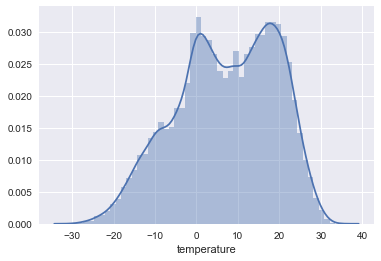

In [46]:
print(data.temperature.describe())
plot = sns.distplot(data.temperature)